In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
faces_all = fetch_olivetti_faces()

In [4]:
X = faces_all.data
y = faces_all.target

In [5]:
print(X.shape)
#print(y)

(400, 4096)


In [6]:
print(X[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


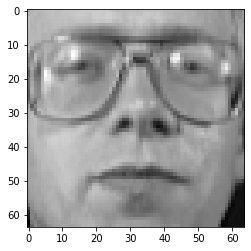

In [7]:
plt.imshow(X[11].reshape(64,64), cmap="gray")

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 4096)
(200, 4096)
(200,)
(200,)


In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
np.mean(log_reg.predict(X_test) == Y_test)

0.855

In [11]:
pca = PCA(n_components=50)   # 4096 -> 140
pca.fit(X_train)

print(X_train.shape)

lowX = pca.transform(X_train)
print(lowX.shape)

(200, 4096)
(200, 50)


In [12]:
recon = pca.inverse_transform(lowX)

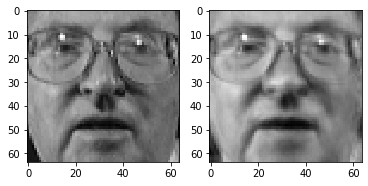

In [13]:
plt.subplot(121)
plt.imshow( X_train[123].reshape(64,64), cmap='gray')
plt.subplot(122)
plt.imshow( recon[123].reshape(64,64), cmap='gray')

In [14]:
log_reg.fit(lowX, Y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#pca = PCA(n_components=50)   # 4096 ->  50
#pca.fit(X_test)
lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

0.845

In [16]:
print(pca.singular_values_)

[64.54345   49.663445  37.04925   28.186384  24.857042  23.400076
 19.567095  17.889639  17.374039  16.260553  15.116674  14.905746
 14.033053  13.517968  13.06664   12.545145  11.810074  11.614306
 11.106724  10.917998  10.689497  10.504487  10.134088   9.934763
  9.408573   9.297062   9.107529   8.811526   8.619231   8.419664
  8.200747   8.160028   7.8895483  7.815837   7.635127   7.4954243
  7.272206   7.0415077  6.9378996  6.818763   6.704574   6.6187453
  6.559717   6.4586105  6.294995   6.1391506  6.0931535  5.9499493
  5.864759   5.7911916]


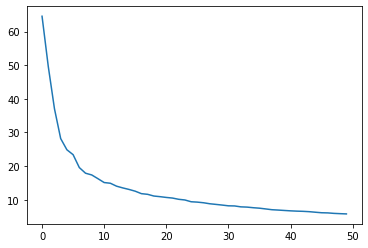

In [17]:
plt.plot(pca.singular_values_)

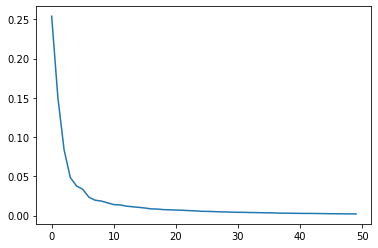

In [18]:
plt.plot(pca.explained_variance_ratio_)

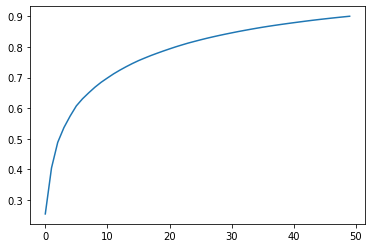

In [19]:
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

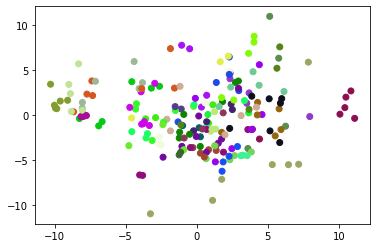

In [20]:
col =  np.random.rand(40,3)
colors = [col[i]  for i in Y_train ]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)

(200, 2)
(200, 1)


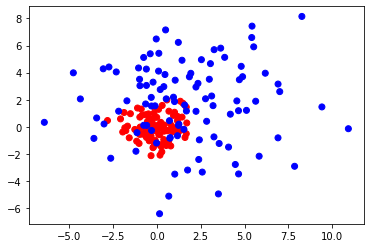

In [21]:
samples = 100

x_data0 = np.random.normal(0, 1, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(2, 3, size=[samples,2])  # b == 1
x_data = np.vstack([x_data0, x_data1])
print(x_data.shape)

y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 
print(y_data.shape)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]

plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [22]:
model = KMeans(n_clusters=2, init="random", max_iter=6).fit(x_data)
print(model.cluster_centers_)

[[-0.03468903  0.08661871]
 [ 3.83092372  3.57344783]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0]


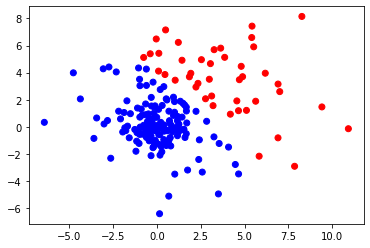

In [23]:
d = ['blue', 'red']
print(model.labels_)
colors = [  d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [24]:
model = KMeans(n_clusters=40, init="random", max_iter=6).fit(X)

print(model.labels_)
print(y)

[ 6 16  6  4 16  4  6 23  6 16 15 39 39 39 39 39 15 15 39 15  7 17 17 30
 30 26 23 23 19 19 15 15 15 19 19 23 19 15 15 17  1  7  7  5  5  5  5  5
  5 23 19 19 19 11 11 11 11 11 11 11 33 33 33 35 35 33 33 33 33 35 37 37
 37 16 37 37 16 37 23 16  1  7  1  1  1  5  5 19  1 19 24 24 24 24 24 24
 24 24  4 37 10 10 10 10 10 10 10 10 10 10 23  1  1 36  1 23  1  7 19 19
  1 17  5  5 19 17 23 23 19  5 36 14 36 36 36 36 36 36 36 36 28 28 28 28
 28 28 28 28 28 28 39  6  6 33 33 39 16  5  6  6 26 26 26 26 19  4  4 19
  4  4 19 19  5 19 19 19 19 19 19  5 34 34 34 31 31 34 31 31 31 34 22 22
 22 28 29 28 29 29 29 22  1  1  1  1  1  1 30 30  1 30  9  9  9  9  9  9
  9  9  9  9 19 19 17  5 17  5 19 19  5 23 28 28  4  4 17 28 28 28  4  4
 17 17 17 17  5 17 19  5 17 17 26 26 26 26 17 26 19 26 26 17 18 18 18 14
 18 14 18 18 18 18  0  0  0  0  0  0  0  0  0  0 20 20 20 30 30 30 30 30
 20 20 22 22 17 22 22 22 22 22  1 22  1 27 12 12 12  1  1  1  1 27 31 31
 31 31 31 31 39 31 31 31 38 38 38 38 38 38 38 38 38

In [25]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [26]:
pca = PCA(n_components=1)  
pca.fit(X)
pca.explained_variance_ratio_

array([0.92461872])

In [27]:
low = pca.transform(X)

In [28]:
model = KMeans(n_clusters=6, init="random", max_iter=6).fit(low)

In [29]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 4, 5, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 5, 4, 4, 4, 5, 5, 4, 2, 2, 2, 2, 5, 4, 4, 5, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 3, 5, 3, 3, 3, 1, 4, 1, 3, 1,
       5, 5, 3, 5, 5, 3, 3, 1, 1, 5, 3, 5, 1, 5, 3, 3, 5, 5, 3, 3, 1, 1,
       3, 5, 5, 1, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 5, 5, 3, 5])

In [30]:
col =  ['red', 'blue', 'black', 'yellow', 'cyan', 'green']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [31]:
col =  ['red', 'blue', 'black']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='*')

col =  ['red', 'black', 'blue']
colors = [col[i]  for i in y ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='^')


IndexError: list index out of range

In [32]:
print(low.shape)
reconX = pca.inverse_transform(low)
print(reconX.shape)

print(X[0:10])
print(reconX[0:10])

(150, 1)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[4.87332632 3.28420238 1.45858847 0.23764012]
 [4.86247892 3.28673941 1.4328746  0.22688569]
 [4.79929088 3.30151808 1.2830867  0.16423922]
 [4.85120324 3.28937661 1.40614547 0.21570665]
 [4.85721176 3.28797132 1.42038875 0.22166368]
 [5.01906124 3.25011732 1.8040546  0.38212597]
 [4.82402881 3.29573228 1.34172822 0.18876513]
 [4.89427975 3.27930171 1.50825879 0.25841396]
 [4.80023332 3.30129766 1.28532076 0.16517358]
 [4.87743522 3.28324137 1.46832867 0.2417138 ]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

tree = DecisionTreeClassifier(max_depth=7)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)


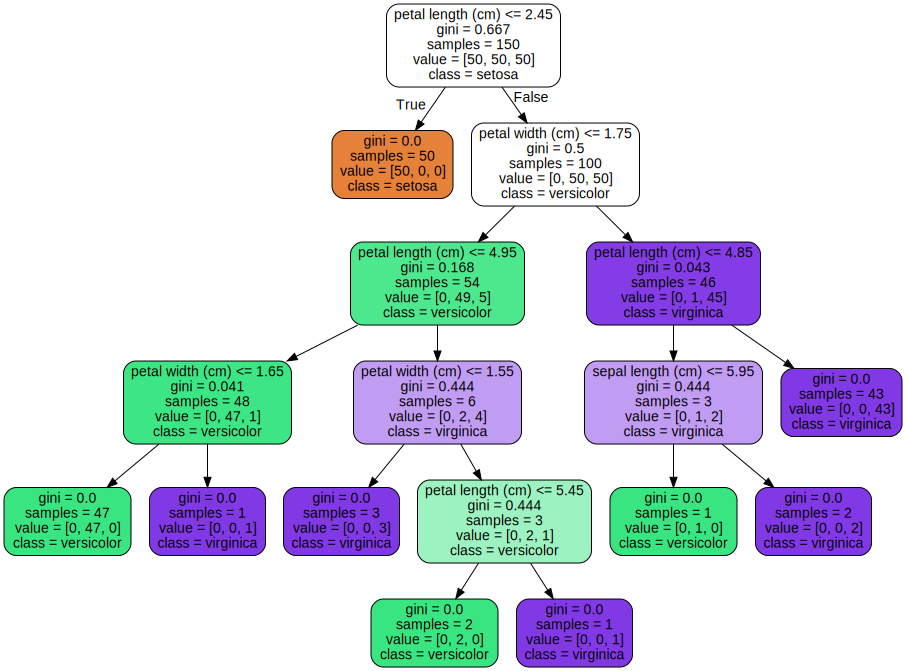

In [36]:
import pydot
graph = pydot.graph_from_dot_file("iris.dot")[0]
import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



In [37]:
# lowX
X = faces_all.data
y = faces_all.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

In [38]:
pca = PCA(n_components=100)   
pca.fit(X_train)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(lowX, Y_train)
print(np.mean(tree.predict(lowX) == Y_train))
print(np.mean(tree.predict(lowX_test) == Y_test))

1.0
0.35


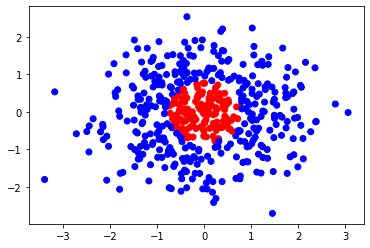

In [39]:
samples = 500
x_data = np.random.normal(0, 1, size=[samples,2])
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ])
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [40]:
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
log_reg.score(x_data, y_data)  #  np.mean(log_reg.predict(x_data) == y_data)인식률 구하는 함수


0.71

In [42]:
from sklearn.svm import SVC
model= SVC(kernel='poly', degree=2).fit(x_data, y_data)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.predict()